# 历史会押韵吗？—— 12月下半月魔咒回测

In [1]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
print('📅 正在翻阅国泰证券的历史日历...')
df = ak.fund_etf_hist_em(symbol='512880',period='daily',start_date='20180101',end_date='20251231')
df['日期'] = pd.to_datetime(df['日期'])
df['收盘'] = pd.to_numeric(df['收盘'])
df = df.sort_values('日期').set_index('日期')
dec_late = df[(df.index.month==12) &(df.index.day>=15)].copy()
yearly_performance = []
years = dec_late.index.year.unique()
for year in years :
    current_year_data = dec_late[dec_late.index.year==year]
    if len(current_year_data)>0:
        start_price = current_year_data.iloc[0]['开盘']
        end_price = current_year_data.iloc[-1]['收盘']
        pct = (end_price - start_price) / start_price *100
        yearly_performance.append({'年份':year,'下半月涨幅':pct})
res_df =pd.DataFrame(yearly_performance)


📅 正在翻阅国泰证券的历史日历...


/var/folders/dw/6xq25tmj0v3_xh9q6vyckgt00000gn/T/ipykernel_48281/2539487291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='年份',y='下半月涨幅',data = res_df,palette=colors)


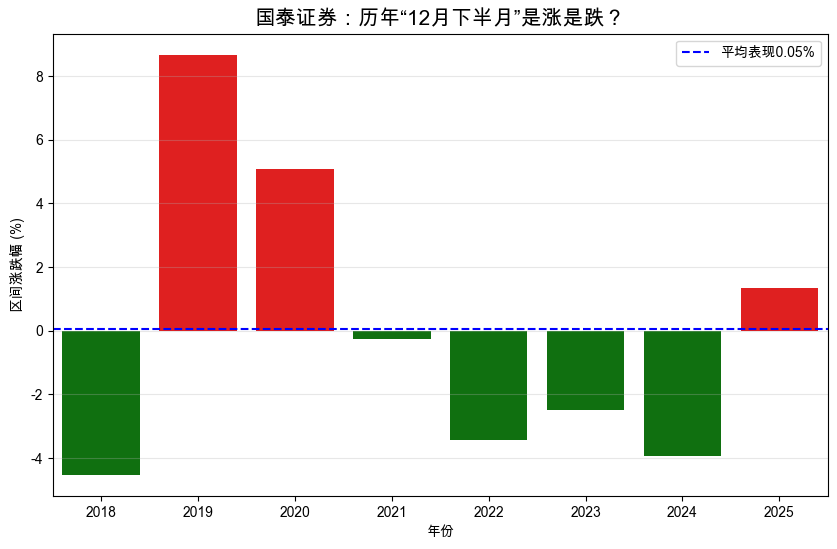

In [3]:
plt.figure(figsize=(10,6))
colors = ['red' if x > 0 else 'green' for x in res_df['下半月涨幅']]
sns.barplot(x='年份',y='下半月涨幅',data = res_df,palette=colors)
avg_return = res_df['下半月涨幅'].mean()
plt.axhline(avg_return,color = 'blue',linestyle = '--',label = f'平均表现{avg_return:.2f}%')
plt.title('国泰证券：历年“12月下半月”是涨是跌？',fontsize = 15)
plt.ylabel('区间涨跌幅 (%)')
plt.grid(True,axis='y',alpha = 0.3)
plt.legend()
plt.show()

In [4]:
print("-" * 30)
print(res_df)
print("-" * 30)
win_count = len(res_df[res_df['下半月涨幅'] > 0])
print(f"📊 历史胜率: {win_count}/{len(res_df)} ({(win_count/len(res_df)*100):.0f}%)")

if avg_return > 0:
    print("💡 结论：历史上年底多为【红包行情】，值得拿着！")
else:
    print("💡 结论：历史上年底多为【结账砸盘】，小心为妙！")

------------------------------
     年份     下半月涨幅
0  2018 -4.527297
1  2019  8.672936
2  2020  5.073087
3  2021 -0.254453
4  2022 -3.444444
5  2023 -2.486486
6  2024 -3.940887
7  2025  1.344538
------------------------------
📊 历史胜率: 3/8 (38%)
💡 结论：历史上年底多为【红包行情】，值得拿着！
